In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import cv2
import glob
from skimage import color
from bs4 import BeautifulSoup
import requests

In [8]:
df_train = pd.read_json('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/train_data.json', lines=True)

In [9]:
df_train.head()

,image_url,image_path,brand,product_title,class_label,color
0,https://m.media-amazon.com/images/I/81XKaSKvly...,images/train/0.jpeg,Womanista,Women's Georgette Saree with Blouse Piece (TKI...,saree,NaN
1,https://m.media-amazon.com/images/I/91dDMDg+QT...,images/train/1.jpeg,Yashika,Women Linen Printed Sarees Free Size (BEE),saree,NaN
2,https://m.media-amazon.com/images/I/71TJ9p46PV...,images/train/2.jpeg,Womanista,Organza Floral Print Saree with Blouse Piece(W...,saree,NaN
3,https://m.media-amazon.com/images/I/81Y+je7CEg...,images/train/3.jpeg,PERFECTBLUE,Women's Digital Cotton Linen Blend Saree with ...,saree,NaN
4,https://m.media-amazon.com/images/I/61B8o9Ulqp...,images/train/4.jpeg,VAIVIDHYAM,Designer Sarees Women's Banarasi Cotton Silk S...,saree,NaN


In [10]:
df_train.tail()

,image_url,image_path,brand,product_title,class_label,color
91161,https://rukminim1.flixcart.com/image/309/371/k...,images/train/91161.jpeg,AURELIA,Women Printed Pure Cotton Straight Kurta,women_kurta,Blue
91162,https://rukminim1.flixcart.com/image/309/371/k...,images/train/91162.jpeg,Prime clothing,Women Checkered Cotton Blend Straight Kurta,women_kurta,White
91163,https://rukminim1.flixcart.com/image/309/371/k...,images/train/91163.jpeg,Vrisa,Women Embroidered Georgette Straight Kurta,women_kurta,White
91164,https://rukminim1.flixcart.com/image/309/371/k...,images/train/91164.jpeg,HELLEN VELLEN,Women Printed Rayon A-line Kurta,women_kurta,Dark Blue
91165,https://rukminim1.flixcart.com/image/309/371/k...,images/train/91165.jpeg,NEW STYLISH,Women Printed Rayon Crepe Blend Straight Kurta,women_kurta,Dark Green


In [11]:
df_train.columns

Index(['image_url', 'image_path', 'brand', 'product_title', 'class_label',
       'color'],
      dtype='object')

In [12]:
df_train.class_label.value_counts()

women_kurta             11694
saree                   10791
blouse                   9174
leggings_and_salwars     7787
kurta_men                6951
dupattas                 6587
nehru_jackets            6491
lehenga                  5753
gowns                    5211
petticoats               4441
dhoti_pants              4145
palazzos                 3375
mojaris_women            3228
sherwanis                2992
mojaris_men              2546
Name: class_label, dtype: int64

In [13]:
df_test = pd.read_json('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/test_data.json', lines=True)

In [14]:
df_test.head()

,image_url,image_path,brand,product_title,class_label,color
0,https://m.media-amazon.com/images/I/71NZQ-aaAS...,images/test/0.jpeg,TANTUJA BENGAL HANDLOOM,(A Govt. of West Bengal Enterprises) Handloom ...,saree,NaN
1,https://m.media-amazon.com/images/I/81aQmbWsG7...,images/test/1.jpeg,Trilok Fab,Women's Silk Saree With Blouse Piece,saree,NaN
2,https://m.media-amazon.com/images/I/71YjGvzs9y...,images/test/2.jpeg,Nine Sister,Women's Georgette Net Embroidered Saree with B...,saree,NaN
3,https://m.media-amazon.com/images/I/81JYhYV5Xr...,images/test/3.jpeg,Gauri Laxmi Enterprise,Women's Crepe Saree with Blouse (GLE$CHICKOO C...,saree,NaN
4,https://m.media-amazon.com/images/I/91fXc5i5Dy...,images/test/4.jpeg,SOURBH,Women's Cotton Blend Digital Butta Printed Sar...,saree,NaN


In [48]:
imgs_train = glob.glob('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/*.jpeg')

In [73]:
saree1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/1.jpeg')

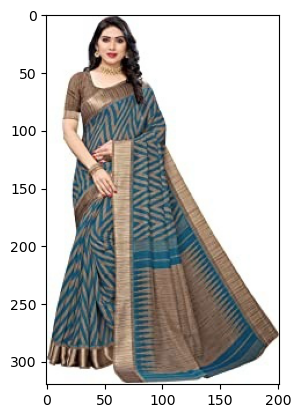

In [74]:
plt.imshow(saree1)

In [75]:
saree1.shape

(320, 201, 3)

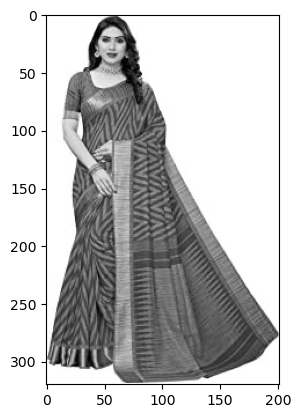

In [76]:
saree1_gray = color.rgb2gray(saree1)
plt.imshow(saree1_gray, cmap='gray')

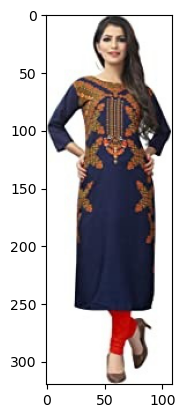

In [20]:
women_kurta1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/90000.jpeg')

plt.imshow(women_kurta1)

In [59]:
women_kurta1.shape

(320, 109, 3)

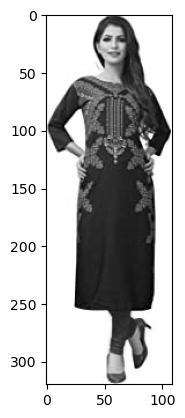

In [21]:
women_kurta1_gray = color.rgb2gray(women_kurta1)
plt.imshow(women_kurta1_gray, cmap='gray')

In [22]:
women_kurta.size

array([255, 255, 255], dtype=uint8)

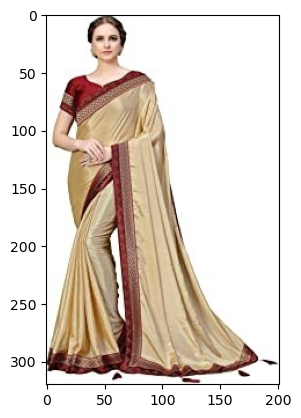

In [26]:
saree2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/5.jpeg')
plt.imshow(saree2)

In [61]:
saree2.shape

(320, 201, 3)

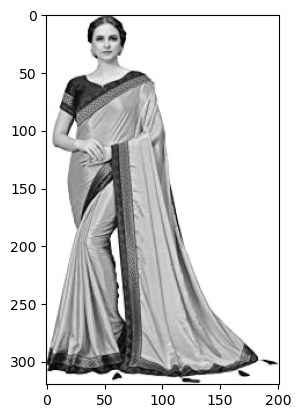

In [27]:
saree2_gray = color.rgb2gray(saree2)
plt.imshow(saree2_gray, cmap='gray')

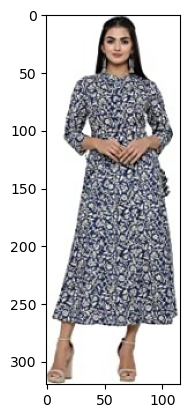

In [28]:
women_kurta2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/90001.jpeg')

plt.imshow(women_kurta2)

In [62]:
women_kurta2.shape

(320, 116, 3)

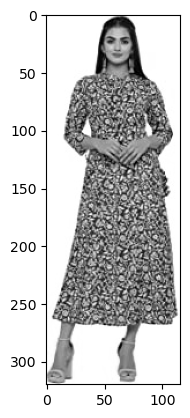

In [30]:
women_kurta2_gray = color.rgb2gray(women_kurta2)
plt.imshow(women_kurta2_gray, cmap='gray')

In [31]:
gown = df_train[df_train['class_label'] == 'gowns']

In [32]:
gown.head()

,image_url,image_path,brand,product_title,class_label,color
30697,https://m.media-amazon.com/images/I/71Yc3-8MbB...,images/train/30697.jpeg,Shehzadi,Women's Fit And Flare Maxi Gown (Teal Blue_XX-...,gowns,NaN
30698,https://m.media-amazon.com/images/I/61A5P4GcDf...,images/train/30698.jpeg,Smily Creation,Women's Taffeta Silk Embroidered Long Anarkali...,gowns,NaN
30699,https://m.media-amazon.com/images/I/61dlrIaTDT...,images/train/30699.jpeg,Fashion Web,Women's Velvet Sequins Semi-Stitched Anarkali ...,gowns,NaN
30700,https://m.media-amazon.com/images/I/714D5kTPK+...,images/train/30700.jpeg,Bollyclues,Women's Mono Net Embroidered Pink Semi Stitch ...,gowns,NaN
30701,https://m.media-amazon.com/images/I/71oiQBgERc...,images/train/30701.jpeg,Shehzadi,Women's Full Stiched Gown Silk Sungudi South I...,gowns,NaN


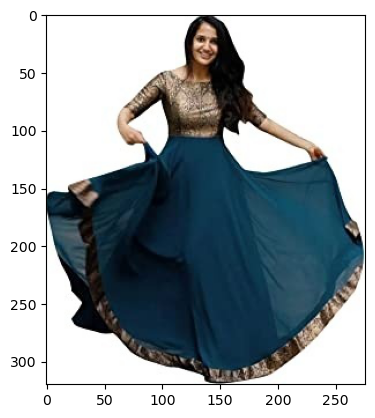

In [33]:
gown1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/30697.jpeg')

plt.imshow(gown1)

In [34]:
gown1.shape

array([255, 255, 255], dtype=uint8)

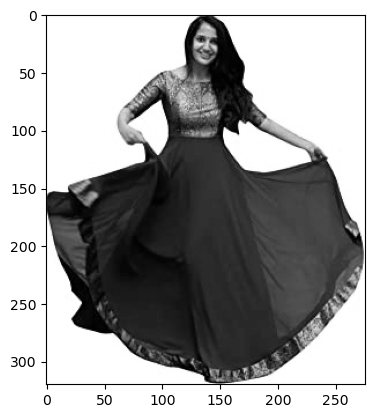

In [35]:
gown1_gray = color.rgb2gray(gown1)
plt.imshow(gown1_gray, cmap='gray')

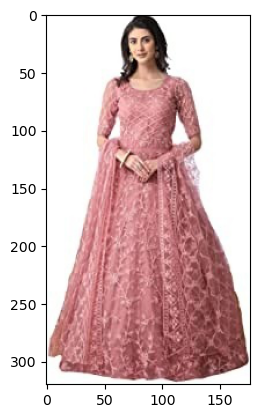

In [36]:
gown2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/30700.jpeg')

plt.imshow(gown2)

In [63]:
gown2.shape

(320, 176, 3)

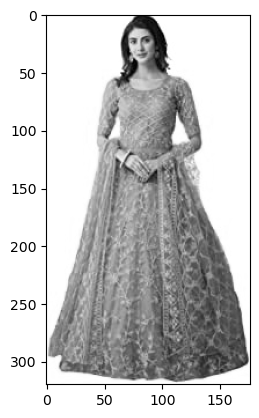

In [37]:
gown2_gray = color.rgb2gray(gown2)
plt.imshow(gown2_gray, cmap='gray')

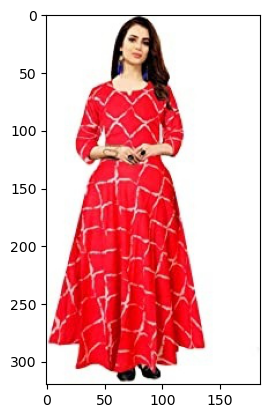

In [38]:
gown3 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/30750.jpeg')

plt.imshow(gown3)

In [ ]:
gown3.shape

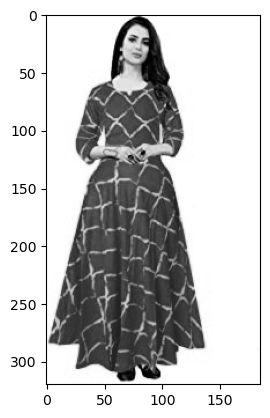

In [39]:
gown3_gray = color.rgb2gray(gown3)
plt.imshow(gown3_gray, cmap='gray')

In [40]:
dupattas = df_train[df_train['class_label'] == 'dupattas']

In [41]:
dupattas.head()

,image_url,image_path,brand,product_title,class_label,color
24110,https://m.media-amazon.com/images/I/81MM7f4lUA...,images/train/24110.jpeg,M7STORE,Women's Embroidered Chanderi Dupatta (M7-D005_...,dupattas,NaN
24111,https://m.media-amazon.com/images/I/61rNOS3TCe...,images/train/24111.jpeg,Generic,Women's Self Design Art Silk Dupatta (BSD001_P...,dupattas,NaN
24112,https://m.media-amazon.com/images/I/81i-miJDsV...,images/train/24112.jpeg,Abdul salam and sons,Women's Cotton Banarasi Cotton Dupatta (ASS09 ...,dupattas,NaN
24113,https://m.media-amazon.com/images/I/61zTDEXy3i...,images/train/24113.jpeg,Weaving Wonders,"Women's Cotton Silk Dupattas (VE11093-C, Power...",dupattas,NaN
24114,https://m.media-amazon.com/images/I/91kN1B51sF...,images/train/24114.jpeg,Nakoda Creation,Women's Dupatta (Pack of 7) (Cotton Printed_Mu...,dupattas,NaN


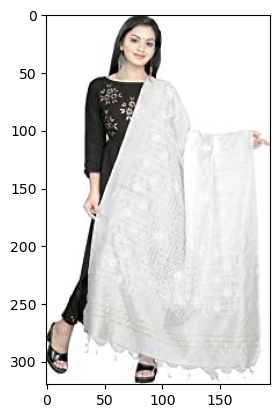

In [42]:
dupatta1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/24110.jpeg')

plt.imshow(dupatta1)

In [ ]:
dupatta1.shape

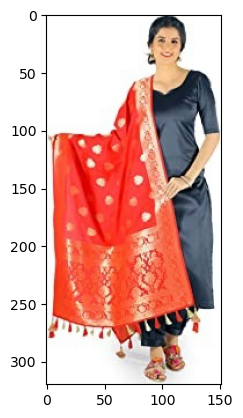

In [43]:
dupatta2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/24210.jpeg')

plt.imshow(dupatta2)

In [ ]:
dupatta2.shape

In [66]:
df_train[df_train.class_label == 'blouse']

,image_url,image_path,brand,product_title,class_label,color
10791,https://m.media-amazon.com/images/I/612b2ktzzK...,images/train/10791.jpeg,KANCHNAR,Women's Cotton Solid 3/4 Sleeve Blouse,blouse,NaN
10792,https://m.media-amazon.com/images/I/51mzZ6Kz-e...,images/train/10792.jpeg,YAZU LIFESTYLE,Women's Velvet Sleevesless Blouse,blouse,NaN
10793,https://m.media-amazon.com/images/I/61Ouviepyg...,images/train/10793.jpeg,Fressia Fabrics,Women's Cotton Readymade Saree Blouse Stretcha...,blouse,NaN
10794,https://m.media-amazon.com/images/I/91ybbMQdz9...,images/train/10794.jpeg,Janasya,Women's Cotton Lycra Stretchable Readymade Blouse,blouse,NaN
10795,https://m.media-amazon.com/images/I/71yKUQMu4+...,images/train/10795.jpeg,Fressia Fabrics,Women's Stretchable Readymade Saree Blouse Cro...,blouse,NaN
...,...,...,...,...,...,...
19960,https://rukminim1.flixcart.com/image/309/371/k...,images/train/19960.jpeg,MOOLDHANI,Round Neck Women Blouse,blouse,N/A
19961,https://rukminim1.flixcart.com/image/309/371/k...,images/train/19961.jpeg,Life win,Round Neck Women Blouse,blouse,N/A
19962,https://rukminim1.flixcart.com/image/309/371/k...,images/train/19962.jpeg,HIYANI ENTERPRISE,Round Neck Women Blouse,blouse,N/A
19963,https://rukminim1.flixcart.com/image/309/371/k...,images/train/19963.jpeg,Sanmati Creation,V-Neck Women Blouse,blouse,N/A


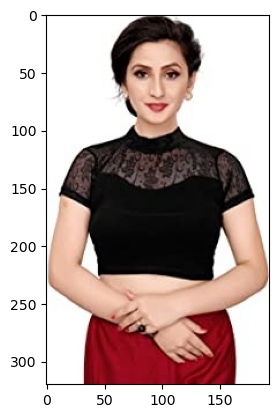

In [68]:
blouse1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/10791.jpeg')
plt.imshow(blouse1)

In [69]:
blouse1.shape

(320, 193, 3)

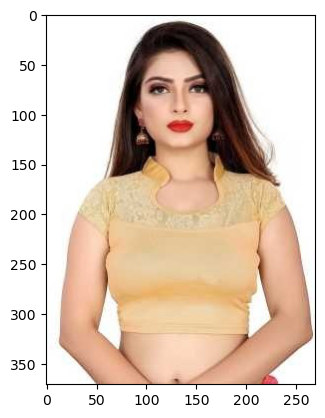

In [71]:
blouse2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/19960.jpeg')
plt.imshow(blouse2)

In [72]:
blouse1.shape

(320, 193, 3)

In [77]:
df_train[df_train.class_label == 'leggings_and_salwars']

,image_url,image_path,brand,product_title,class_label,color
42859,https://m.media-amazon.com/images/I/71emZhYvvK...,images/train/42859.jpeg,Pixie,Readymade Cotton Patiala Salwar Pants for Wome...,leggings_and_salwars,NaN
42860,https://m.media-amazon.com/images/I/31UbDv7Quk...,images/train/42860.jpeg,Prabha Creations,Cotton patiyala salwar for women (free size; p...,leggings_and_salwars,NaN
42861,https://m.media-amazon.com/images/I/41xuDLeaUJ...,images/train/42861.jpeg,PI World,Women's Cotton Patiala Salwar Free Size Cotton...,leggings_and_salwars,NaN
42862,https://m.media-amazon.com/images/I/61e2WMxT49...,images/train/42862.jpeg,patiala,Women's Semi Patiala Salwar With Dupatta,leggings_and_salwars,NaN
42863,https://m.media-amazon.com/images/I/71VBuAI0Cx...,images/train/42863.jpeg,KRISHNA FASHION,Women's Cotton Traditional Patiala Salwars (Bl...,leggings_and_salwars,NaN
...,...,...,...,...,...,...
50641,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/50641.jpeg,W,Wishful by Women Beige Churidar Leggings,leggings_and_salwars,NaN
50642,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/50642.jpeg,W,Women Turquoise Green Churidar Leggings,leggings_and_salwars,NaN
50643,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/50643.jpeg,De Moza,Blue Solid Churidar Leggings,leggings_and_salwars,NaN
50644,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/50644.jpeg,Soch,Women Green Churidar Leggings,leggings_and_salwars,NaN


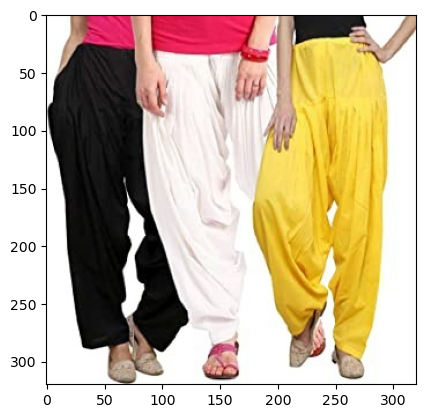

In [79]:
leggings_and_salwars1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/42859.jpeg')
plt.imshow(leggings_and_salwars1)

In [80]:
leggings_and_salwars1.shape

(320, 320, 3)

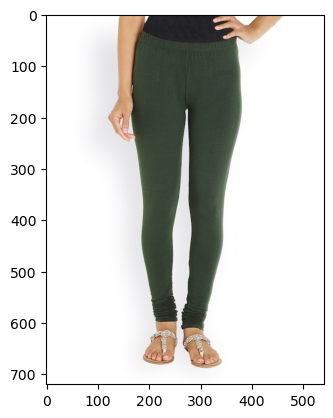

In [81]:
leggings_and_salwars1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/50644.jpeg')
plt.imshow(leggings_and_salwars1)

In [82]:
leggings_and_salwars1.shape

(720, 540, 3)

In [83]:
df_train[df_train.class_label == 'kurta_men']

,image_url,image_path,brand,product_title,class_label,color
35908,https://m.media-amazon.com/images/I/3164uwl5iJ...,images/train/35908.jpeg,HOLLOW,Men's Cotton Kurta,kurta_men,NaN
35909,https://m.media-amazon.com/images/I/61f25R890o...,images/train/35909.jpeg,BENSTOKE,Cotton Blend Short Kurta for Men,kurta_men,NaN
35910,https://m.media-amazon.com/images/I/710eRIuMTe...,images/train/35910.jpeg,BENSTOKE,Mens Silk Blend Silver Short Kurta,kurta_men,NaN
35911,https://m.media-amazon.com/images/I/714nK0ymt-...,images/train/35911.jpeg,BENSTOKE,Mens Cotton Short Kurta,kurta_men,NaN
35912,https://m.media-amazon.com/images/I/61natAA3IQ...,images/train/35912.jpeg,BENSTOKE,Men's Cotton Regular Kurta,kurta_men,NaN
...,...,...,...,...,...,...
42854,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/42854.jpeg,Jompers,Men Black Solid Kurta with Churidar,kurta_men,NaN
42855,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/42855.jpeg,Chitwan Mohan,Men Turquoise Blue Solid Straight Kurta,kurta_men,NaN
42856,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/42856.jpeg,KISAH,Men Yellow Solid Straight Kurta,kurta_men,NaN
42857,"https://assets.myntassets.com/h_720,q_90,w_540...",images/train/42857.jpeg,DEYANN,Men Off-White Solid Kurta with Patiala &amp; N...,kurta_men,NaN


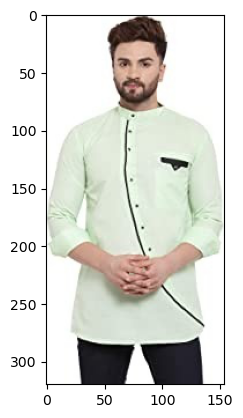

In [87]:
kurta_men1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/35909.jpeg')
plt.imshow(kurta_men1)

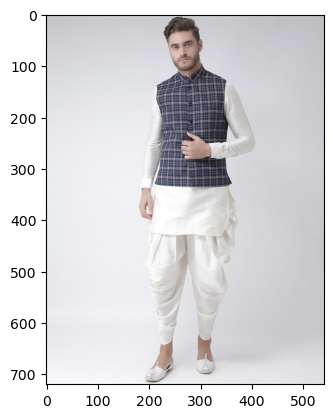

In [89]:
kurta_men2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/42857.jpeg')
plt.imshow(kurta_men2)

In [90]:
kurta_men2.shape

(720, 540, 3)

In [91]:
df_train[df_train.class_label == 'lehenga']

,image_url,image_path,brand,product_title,class_label,color
50646,https://m.media-amazon.com/images/I/519cg84PBk...,images/train/50646.jpeg,FEXEL,Women's Velvet Semi-stitched Lehenga Choli (VC...,lehenga,NaN
50647,https://m.media-amazon.com/images/I/41tAwKQRNU...,images/train/50647.jpeg,TWISHA ENTERPRISE,Tissue Net Embroidered Lahenga Choli Dupata - ...,lehenga,NaN
50648,https://m.media-amazon.com/images/I/61r-dWkdOI...,images/train/50648.jpeg,Lehenga Style,Women's Heavy Net Embroidery Semi-stitched Leh...,lehenga,NaN
50649,https://m.media-amazon.com/images/I/71l5l+upXA...,images/train/50649.jpeg,Lehenga Style,Women's Silk Semi-stitched Lehenga Choli (MF-6...,lehenga,NaN
50650,https://m.media-amazon.com/images/I/71H5s+Nn1K...,images/train/50650.jpeg,Bollyclues,Women's Net Embroidered Semi-Stitched Lehenga ...,lehenga,NaN
...,...,...,...,...,...,...
56394,https://assets0.mirraw.com/images/6532980/imag...,images/train/56394.jpeg,Mirraw,Beige Embroidered Net Semi Stitched Lehenga Wi...,lehenga,NaN
56395,https://assets0.mirraw.com/images/6532993/imag...,images/train/56395.jpeg,Mirraw,Pink Embroidered Silk Semi Stitched Lehenga Wi...,lehenga,NaN
56396,https://assets0.mirraw.com/images/7277550/imag...,images/train/56396.jpeg,Mirraw,Yellow Embroidered Silk Semi Stitched Lehenga,lehenga,NaN
56397,https://assets0.mirraw.com/images/7292678/imag...,images/train/56397.jpeg,Mirraw,Sea-Green Embroidered Silk Semi Stitched Lehenga,lehenga,NaN


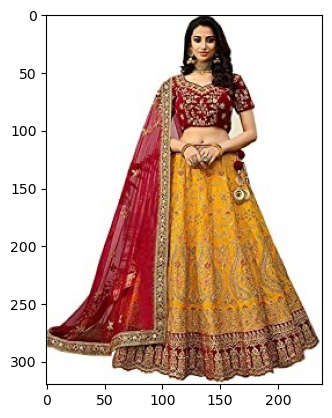

In [94]:
lehenga1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/50649.jpeg')
plt.imshow(lehenga1)

In [95]:
lehenga1.shape

(320, 239, 3)

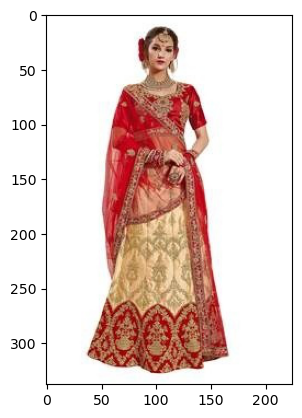

In [97]:
lehenga2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/56398.jpeg')
plt.imshow(lehenga2)

In [98]:
lehenga2.shape

(338, 225, 3)

In [100]:
df_train[df_train.class_label == 'palazzos']

,image_url,image_path,brand,product_title,class_label,color
68664,https://m.media-amazon.com/images/I/715CMJQaHX...,images/train/68664.jpeg,Generic,Women's Regular Fit Palazzo (Pack of 2),palazzos,NaN
68665,https://m.media-amazon.com/images/I/81BY5NdkKS...,images/train/68665.jpeg,pdpm,Women's Palazzo Shimmer (Gold),palazzos,NaN
68666,https://m.media-amazon.com/images/I/51SUSdNQkT...,images/train/68666.jpeg,RJ CREATION,Fashion Women's Regular Fit Palazzos (Pack of 2),palazzos,NaN
68667,https://m.media-amazon.com/images/I/5175NBo66-...,images/train/68667.jpeg,Generic,Jocote Crush Palazzo with Beeds,palazzos,NaN
68668,https://m.media-amazon.com/images/I/71vkLaq+Td...,images/train/68668.jpeg,Co-Ords Fashion,Women's Palazzo (Pack of 2),palazzos,NaN
...,...,...,...,...,...,...
72034,https://img6.craftsvilla.com/image/upload/w_30...,images/train/72034.jpg,Craftsvilla,Clora White ...,palazzos,NaN
72035,https://img6.craftsvilla.com/image/upload/w_30...,images/train/72035.jpg,Craftsvilla,Clora Peach Full ...,palazzos,NaN
72036,https://img6.craftsvilla.com/image/upload/w_30...,images/train/72036.jpg,Craftsvilla,Clora Navy Blue ...,palazzos,NaN
72037,https://img6.craftsvilla.com/image/upload/w_30...,images/train/72037.jpg,Craftsvilla,Clora Grey Solid ...,palazzos,NaN


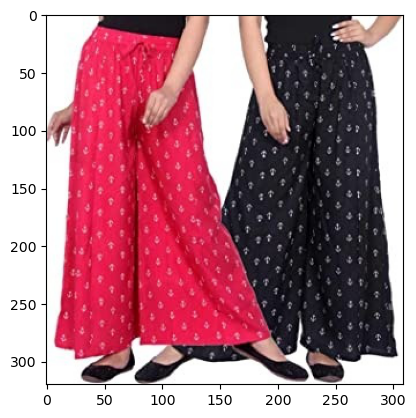

In [101]:
palazzos1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/68664.jpeg')
plt.imshow(palazzos1)

In [112]:
palazzos1.shape

(320, 309, 3)

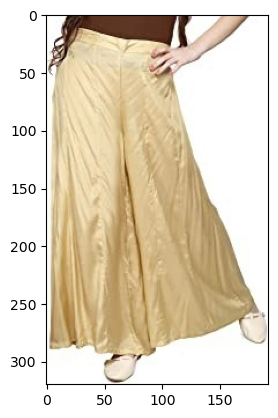

In [110]:
palazzos2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/68665.jpeg')
plt.imshow(palazzos2)

In [111]:
palazzos2.shape

(320, 192, 3)

In [114]:
df_train[df_train.class_label == 'mojaris_women']

,image_url,image_path,brand,product_title,class_label,color
58945,https://m.media-amazon.com/images/I/615mPakMqS...,images/train/58945.jpeg,RSK Ethnic Wear,Women's Jutti,mojaris_women,NaN
58946,https://m.media-amazon.com/images/I/71XrCM2df0...,images/train/58946.jpeg,Nakh,Women Ethnic Mojari Jutti Pearl and Sequins Wo...,mojaris_women,NaN
58947,https://m.media-amazon.com/images/I/61glP6h+f4...,images/train/58947.jpeg,RSK Ethnic Wear,Women's Jutti,mojaris_women,NaN
58948,https://m.media-amazon.com/images/I/61L-TVr9m5...,images/train/58948.jpeg,Generic,RMH Women's Ethnic Rajasthani Handmade Jutti/M...,mojaris_women,NaN
58949,https://m.media-amazon.com/images/I/81noZS5RO0...,images/train/58949.jpeg,Generic,Women's White Mojari -7 UK,mojaris_women,NaN
...,...,...,...,...,...,...
62168,N/A,images/train/62168.jpeg,N/A,N/A,mojaris_women,NaN
62169,N/A,images/train/62169.jpeg,N/A,N/A,mojaris_women,NaN
62170,N/A,images/train/62170.jpeg,N/A,N/A,mojaris_women,NaN
62171,N/A,images/train/62171.jpeg,N/A,N/A,mojaris_women,NaN


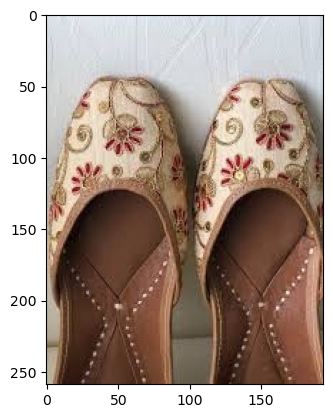

In [117]:
mojaris_women1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/62172.jpeg')
plt.imshow(mojaris_women1)

In [118]:
mojaris_women1.shape

(259, 194, 3)

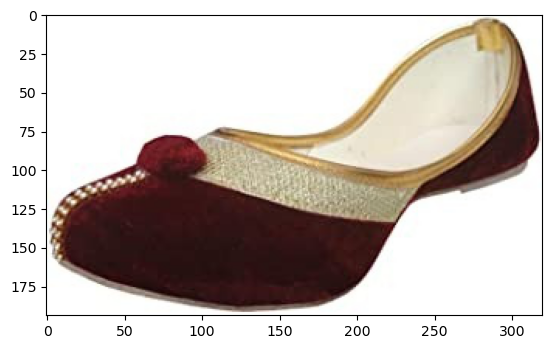

In [119]:
mojaris_women2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/train/60000.jpeg')

plt.imshow(mojaris_women2)

In [120]:
mojaris_women2.shape

(194, 320, 3)

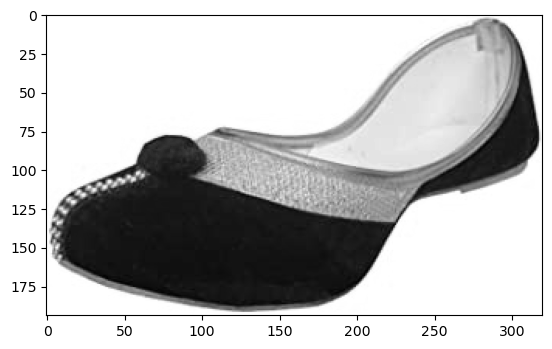

In [121]:
mojaris_women2_gray = color.rgb2gray(mojaris_women2)
plt.imshow(mojaris_women2_gray, cmap='gray')

In [ ]:
url_mens_kurta_list = ['https://www.tjori.com/collections/men-kurta-pyjama', 'https://suta.in/collections/kurtas-1', \
                        'https://www.jaypore.com/search?q=&_category_level_2=Clothing&_category_level_3=Men&_category_level_4=Kurtas&orderBy=-searchpos', \
                        'https://www.mirraw.com/men/clothing/kurtas' ]

In [2]:
url_mens_kurta_list = ['https://www.mirraw.com/men/clothing/kurtas']

for i in range(2, 83):
    url = f'https://www.mirraw.com/men/clothing/kurtas?page={i}'
    url_mens_kurta_list.append(url)
  

In [16]:
url_mens_kurta_list = ['https://www.jaypore.com/search?q=&_category_level_2=Clothing&_category_level_3=Men&_category_level_4=Kurtas&orderBy=-searchpos']

In [2]:
# code from https://www.makeuseof.com/python-scrape-web-images-how-to/

url_mens_kurta_list = ['https://www.kalkifashion.com/saree-blouses.html']
for url in url_mens_kurta_list: 
    print(url)
    URL = url
    getURL = requests.get(URL, headers={'User-Agent':'Safari/16.5'})
    soup = BeautifulSoup(getURL.text, 'html.parser')
    
    images = soup.find_all('img')
    resolvedURLs = []
    
    for image in images:
        src = image.get('src')
        resolvedURLs.append(requests.compat.urljoin(URL, src))
        

        
        
    for image in resolvedURLs:
        image = image.split('?', 1)[0]
        
        try:
            webs = requests.get(image)
            open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/blouses/' + image.split('/')[-1], 'wb').write(webs.content)
        except:
            print(image)
       

       
            
    

    
         

https://www.kalkifashion.com/saree-blouses.html


In [32]:

    
    URL = 'https://suta.in/collections/lehengas'
    getURL = requests.get(URL, headers={'User-Agent':'Safari/16.5'})
    soup = BeautifulSoup(getURL.text, 'html.parser')
    
    images = soup.find_all('img')
    resolvedURLs = []
    
    for image in images:
        src = image.get('src')
        resolvedURLs.append(requests.compat.urljoin(URL, src))
        

        
        
    for image in resolvedURLs:
        image = image.split('?', 1)[0]
        
        try:
            webs = requests.get(image)
            open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/lehengas/' + image.split('/')[-1], 'wb').write(webs.content)
        except:
            print(image)

In [158]:
for img in resolvedURLs:
        try:
            webs = requests.get(img)
        except:
            print(img)
        open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing/data/raw/indian_clothing/images/kurtas_men/' + img.split('/')[-1], 'wb').write(webs.content)
       
    
    

In [ ]:
https://suta.in/collections/lehengas